In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('mymoviedb.csv', on_bad_lines='skip', engine='python')

In [3]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Popularity
count,9827.000000
mean,40.320570
std,108.874308
min,7.100000
25%,16.127500
50%,21.191000
75%,35.174500
max,5083.954000


Things to do:
1) Convert the datatype of the Vote_count and vote_avg to numerical as it is object type in the data
2) convert the datatype of realese date to date time and extract only year value
3) Overview, Original language and Poster_url are not useful during analysis so we will drop them
4) remove white spaces in genre column

In [8]:
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9826 non-null   float64
 5   Vote_Average       9826 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.8+ KB


In [10]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.000000,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,444.000000,6.500000
75%,35.174500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [11]:
print(df['Popularity'].isnull().sum())
print(df['Vote_Count'].isnull().sum())
print(df['Vote_Average'].isnull().sum())

10
11
11


In [12]:
df_missing_votes = df[df['Vote_Count'].isnull() | df['Vote_Average'].isnull()]
# Then check if 'Popularity' is NOT null in these rows
print(df_missing_votes[df_missing_votes['Popularity'].notnull()])

         Release_Date   Title Overview  Popularity  Vote_Count  Vote_Average  \
1115   - Magic Tricks  61.328       35         7.1         NaN           NaN   

                                      Original_Language Genre Poster_Url  
1115  https://image.tmdb.org/t/p/original/6iXYe7AkQ1...  None       None  


In [13]:
df_missing_votes = df[df['Vote_Count'].isnull() | df['Vote_Average'].isnull()]
print(df_missing_votes[df_missing_votes['Popularity'].notnull()]) # To see the specific row

         Release_Date   Title Overview  Popularity  Vote_Count  Vote_Average  \
1115   - Magic Tricks  61.328       35         7.1         NaN           NaN   

                                      Original_Language Genre Poster_Url  
1115  https://image.tmdb.org/t/p/original/6iXYe7AkQ1...  None       None  


In [14]:
df.dropna(subset=['Vote_Count', 'Vote_Average'], inplace=True)

In [15]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [16]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9826.000000,9826.000000,9826.000000
mean,40.323951,1392.943721,6.439467
std,108.879332,2611.303856,1.129797
min,13.354000,0.000000,0.000000
25%,16.128250,146.000000,5.900000
50%,21.195000,444.000000,6.500000
75%,35.179250,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [17]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [18]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [19]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Droping the columns which are not required

In [20]:
cols = ['Overview','Original_Language','Poster_Url']

In [21]:
df.drop(cols, axis=1, inplace=True)

In [22]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


Categorize Vote_Average column:
Cuting  Vote_Average values and make 4 categories: popular average below_avg not_popular to describe it more using catigorize_col() function

In [23]:
def categorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]

    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df

In [24]:
labels = ['not_popular', 'below_average', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [25]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,below_average,Thriller
3,2021,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


In [26]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular      2467
popular          2450
average          2411
below_average    2398
Name: count, dtype: int64

In [27]:
df.dropna(inplace=True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

Spliting the genres into list and explode our dataframe in such way that it will have only one genre per row for a movie

In [29]:
df['Genre']= df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop=True)
df.head(10)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,Crime
4,2022,The Batman,3827.658,1151.0,popular,Mystery
5,2022,The Batman,3827.658,1151.0,popular,Thriller
6,2022,No Exit,2618.087,122.0,below_average,Thriller
7,2021,Encanto,2402.201,5076.0,popular,Animation
8,2021,Encanto,2402.201,5076.0,popular,Comedy
9,2021,Encanto,2402.201,5076.0,popular,Family


In [30]:
#Casting column into category

df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  float64 
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: category(2), float64(2), int32(1), object(1)
memory usage: 749.6+ KB


In [33]:
 df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [36]:
sns.set_style("whitegrid")

# Most Frequent Genre of movies released on Netflix

In [37]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

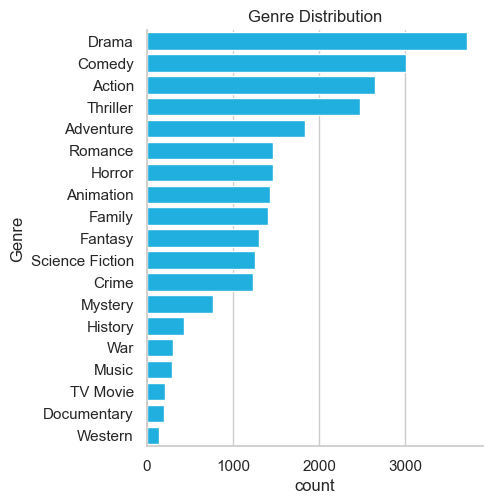

In [39]:
 sns.catplot(y = 'Genre', kind = 'count', data = df, 
             order= df['Genre'].value_counts().index,
             color = '#00BFFF')
plt.title('Genre Distribution')
plt.show()

# Highest Votes in Vote average column

In [40]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,Crime
4,2022,The Batman,3827.658,1151.0,popular,Mystery


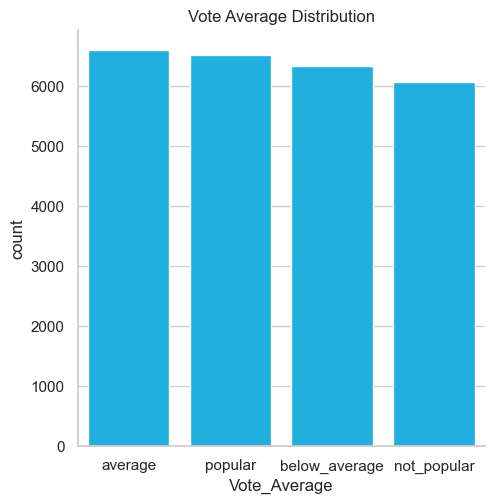

In [50]:
 sns.catplot(x= 'Vote_Average', kind = 'count', data = df,
             order= df['Vote_Average'].value_counts().index,
             color = '#00BFFF')
plt.title('Vote Average Distribution')
plt.show()

# Movie with Highest Popularity and what is its genre

In [45]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction


# Movie with lowest popularity and its Genre

In [46]:
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152.0,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152.0,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152.0,average,History
25548,1984,Threads,13.354,186.0,popular,War
25549,1984,Threads,13.354,186.0,popular,Drama
25550,1984,Threads,13.354,186.0,popular,Science Fiction


# The year which has the most filmed movies

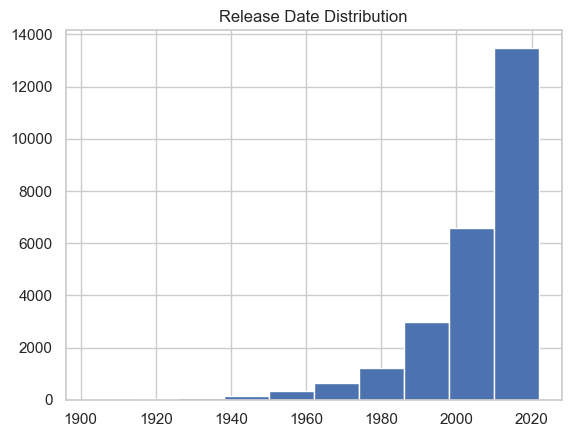

In [47]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()

# Summary of the Netflix Data analysis:
1) Drama is the most frequent Genre in our dataset which has appeared more than all other 18 genres
2) Most of the movies got Popular rating are havong genre Drama. Hence Drama is the most popular genre amongst viewers
3) Spider-man: No way home has the highest popularity in our dataset
4) the United states vs Billie Holiday and Threads are the least popular movies from our dataset
5) Year 2020 has the highest filmed movies